# Ex. 1 - Getting Started

In this short tutorial we will discuss the basics of python and numeric python to get you started into advanced data analysis.

We will use as an example the dataset from a Simulation of the CMS experiment, at CERN.

First of all, let's obtain the required software and the data.
This is a bit technical, don't be scared. Just skip to the next cell!

In [ ]:
!pip install uproot
files = {
    "WWTo2L2Nu1.root": "1oix_LaKYaPgMPdOcG8O6_qwq3a0CD1EO",
    "GGToHToWWTo2L2Nu1.root": "1lD3JG12bP21oN94bEmDOZuLQBd4y2Dwk",
    "WWTo2L2Nu2.root":"1KTlRb66tSPajEpJJoLqmqisBQW-Pakjk",
    "GGToHToWWTo2L2Nu2.root": "1X72-i7qrYqQyA02jCESFFlSq33__x_tq"}
!rm -f *.root
import os 
for kv in files.items():
  if not os.path.exists(kv[0]):
    a = os.system ( "wget -O %s --no-check-certificate 'https://docs.google.com/uc?export=download&id=%s'" % kv )
    if a: raise IOError ( "Could not download %s (%s)" % kv ) 

     |████████████████████████████████| 245kB 5.1MB/s 


### Loading and explaining the dataset
Let's list the files in the current directory.

In [ ]:
!ls -l

total 1908
-rw-r--r-- 1 root root 485452 Jun 10 14:41 GGToHToWWTo2L2Nu1.root
-rw-r--r-- 1 root root 485432 Jun 10 14:41 GGToHToWWTo2L2Nu2.root
drwxr-xr-x 1 root root   4096 Jun  1 13:40 sample_data
-rw-r--r-- 1 root root 486239 Jun 10 14:41 WWTo2L2Nu1.root
-rw-r--r-- 1 root root 486076 Jun 10 14:41 WWTo2L2Nu2.root


There are four files, and one directory. 
The directory is something internal to Google Colaboratory, and can be safely ignored for the moment, while the files contain the data that we have just downloaded. 

The names are *self-explainatory* to those who chose them, but may feel obscure at a first sight:
 * `GGToHToWWTo2L2Nu{12}.root` stands for gluon-gluon fusion (GG) producing (To) a Higgs boson (H) which decays into (To) a pair of W bosons (WW), which decay into a lepton and a neutrino, each. So in the final state you will have two leptons and two neutrinos (2L2Nu) We have two independent datasets indicated as 1 and 2 (1 or 2).
 * `WWTo2L2Nu{12}.root` stands for two randomly paired W bosons (WW) decaying into (To) a lepton and a neutrino, each. Hence, the final state is made of two leptons and two neutrinos (2L2Nu) again. 

So we will refer to the first one as **signal** because it contains events with 2 charged leptons and 2 neutrinos from a simulated higgs decay, while the second will be our **background** because it contains events where the same final state is obtained via a random combination of W bosons, unrelated to the production of a higgs. 

**Note: We will ignore the second copy of each file in the first exercise**

The files are in ROOT format. ROOT is a large and powerful framework developed by CERN and released under an open source licence that ease data analysis in C++ and it is widely adopted by the High-Energy Physics Experiment to deal with the event reconstruction phase, and for analysing large datasets on distributed computing systems such as the Computing Grid.

If you plan to become a software expert within one of the many HEP Collaborations, getting accustomed with ROOT might be a good idea, but not for today.
The ROOT files can be loaded into a ROOT-less framework through the `uproot` python library. 

So, as a first step, let's open these files and have a look to what's in.

In [ ]:
import uproot
f_signal      = uproot.open ( "GGToHToWWTo2L2Nu2.root" )
f_background  = uproot.open ( "WWTo2L2Nu2.root" )
print ("Keys in f_signal:")
print ("\n".join([" * " + str(k) for k in f_signal.keys()]))
print ("Keys in f_background:")
print ("\n".join([" * " + str(k) for k in f_background.keys()]))

Keys in f_signal:
 * latino;1
Keys in f_background:
 * latino;1


Both the signal and background files contain a single record, named "latino" which has never been updated after it was created the first time (`;1` means accessed 1 for writing).

In case you wonder, "latino" indicates one of the groups within CMS who is working on this important analysis, mainly composed of Italian and Spanish physicists.

For practical usage, it is much easier to transform these datasets into pandas dataframe, this is not always possible because ROOT files can be much more complicated than a simple table structured in columns and entries (a pandas dataframe), but in this it works. Thanks, *latinos*!

In [ ]:
signal = f_signal['latino'].arrays(library='pd')
background = f_background['latino'].arrays(library='pd')


Let's have a look to what variables are defined in is in the "latino" record. 

In [ ]:
print (", ".join(signal.columns))
print (", ".join(background.columns))

metPfType1Phi, metPfType1, drll, njet, mTi, dphill, dphillmet, ptll, mll, dphilmet, mth
metPfType1Phi, metPfType1, drll, njet, mTi, dphill, dphillmet, ptll, mll, dphilmet, mth


Great! So both files contain the exact same set of variables, thanks *latinos*!
Let's have a chat with him to understand the naming convention he adopted, unless it's obvious to you...

  * `mll` is the invariant mass of the two leptons: 
 $m_{\ell\ell} = \sqrt { p^{\ell1} p^{\ell2} (1 - \cos\Delta\varphi) } $
  * `mth` is the missing transverse mass of the higgs: 
 $m_{T} = \sqrt { p^{\ell_T\ell_T} p^{miss} (1 - \cos\Delta\varphi) } $
  * `njet` is the number of particle jets reconstructed in the event
  * `ptll` is the transverse momentum of the lepton pair
  * `drll` is the $\Delta R$ variable of the lepton pairs, defined as 
  $\Delta R = \sqrt {(\Delta \eta^2 + \Delta \varphi^2)}$
  where $\Delta\eta$ is the difference between the pseudorapidity eta of each of the leptons while $\Delta\varphi$ is the differnece between the azimuthal angle of the two leptons;
  * `mTi` is the *improved missing transverse mass*, defined as the invariant mass of the leptons added to the missing transverse momentum
  * `dphill` stands for $\Delta \varphi$ of the lepton pair;
  * `dphillmet` stands for $\Delta \varphi$ between the lepton pair and the missing transverse momentum;
  * `dphilmet` stands for $\Delta \varphi$ between the first of the leptons and the missing transverse momentum;
  * `metPfType1` is the missing transverse energy.
  * `metPfType1Phi` is the azimutal angle of the missing energy. 

So, thanks *latinos* let's move forward.

Since the columns of the two datasets are the same, let's merge the signal and background samples into a unique dataset, with a column defining the origin of each entry. 
Let's say we label **1** the **signal** events, and **0** the **background** events.



In [ ]:
import pandas as pd

signal['label'] = 1
background['label'] = 0
dataset = pd.concat ( (signal, background) )

### Binary classification with a single variable
From now on, we will discuss methods and techniques to distinguish the signal from the background. 
This problem is named a **binary classification**  since we ask the question: *I've just got a new entry, is this either signal or background?*

Let's start considering it as univariate problem. From physical principle we expect that events involving the production of a scalar Higgs boson to have the two charged leptons produced with a small angle between their momenta, so we will start with the $\Delta R$ variable which is a measure of the angle between the two leptons. 

In [ ]:
print ("""
  Signal     {mean_s:10.2f} GeV/c  with std. deviation {stddev_s:10.2f} GeV/c
  Background {mean_b:10.2f} GeV/c  with std. deviation {stddev_b:10.2f} GeV/c
""".format (
    mean_s = signal['drll'].mean(),
    mean_b = background['drll'].mean(),    
    stddev_s = signal['drll'].std(),
    stddev_b = background['drll'].std(),
))


  Signal           1.29 GeV/c  with std. deviation       0.60 GeV/c
  Background       2.23 GeV/c  with std. deviation       0.86 GeV/c



The value of drll, aka $\Delta R$ is indeed, on average, smaller for the signal than it is for background. So let's try to make histograms to show the two distributions of $\Delta R$.

For plotting we will use `pyplot` delivered with the python library `matplotlib`.

Have a look to the documentation of the `pyplot.hist` function [here](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) or just Google for it.

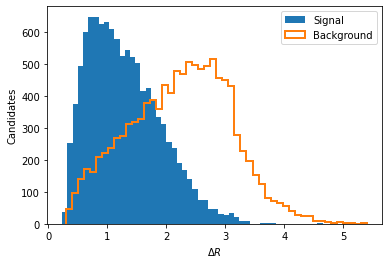

In [ ]:
import matplotlib.pyplot as plt
plt.hist ( signal['drll'], label='Signal' , bins = 50 )
plt.hist ( background['drll'], histtype = "step", linewidth=2, label='Background', bins = 50 )
plt.xlabel ( "$\Delta R$" )
plt.ylabel ( "Candidates" )
plt.legend()
plt.show()

The two distributions are indeed quite diifferent, let's try to quantify this difference into a number. For example we can use the [Kolmogorv Distance](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) which is defined as the maximum distance between two cumulative distributions. Graphically, it is the maximum distance between the two lines shown below.



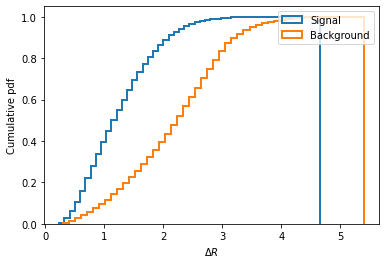

In [ ]:
import matplotlib.pyplot as plt
plt.hist ( signal['drll'], histtype = "step", linewidth=2, label='Signal' , bins = 50, cumulative=True, density=True )
plt.hist ( background['drll'], histtype = "step", linewidth=2, label='Background', bins = 50, cumulative=True, density=True )
plt.xlabel ( "$\Delta R$" )
plt.ylabel ( "Cumulative pdf" )
plt.legend()
plt.show()

Let's compute it (with some acceptable approximation). We define an x-axis as a sequence of ticks at fixed pitch spanning from the minimal to the maximal value that the $\Delta R$ can hold within the whole dataset.
This is achieved with the numpy function `linspace`: 

In [ ]:
import numpy as np
xAxis = np.linspace ( dataset['drll'].min(), dataset['drll'].max(), 100 )

Then we use the x-axis we have just defined as boundaries for two histograms

In [ ]:
h_signal, _ = np.histogram(signal['drll'], bins=xAxis)
h_background, _ = np.histogram(background['drll'], bins=xAxis)

`h_signal` and `h_background` contain the series of values representing the content of the histograms, to obtain the cumulative distribution we need to:
1. normalize the histogram dividing by the total number of entries
2. sum the content of the bins iteratively from left to right (we can use the `np.cumsum` function for this)


In [ ]:
c_signal = np.cumsum (h_signal / h_signal.sum())
c_background = np.cumsum (h_background / h_background.sum())

If we now take the difference between the two cumulative distributions, we get a series of values representing the bin-by-bin difference. 

Let's plot it.

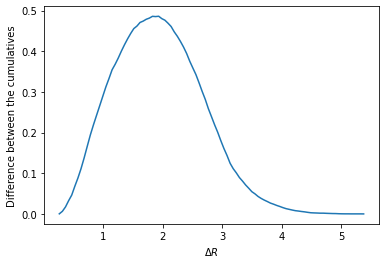

In [ ]:
c_diff = c_signal - c_background
plt.plot (0.5 * (xAxis[1:] + xAxis[:-1]), c_diff)
plt.xlabel ( "$\Delta R$"); plt.ylabel ( "Difference between the cumulatives" )
plt.show()

The Kolmogorv distance is just the maximum of this curve

In [ ]:
kdist = np.max(np.abs(c_diff))
print ("The Kolmogorv distance for variable drll is %.1f%%" % (100. * kdist))

The Kolmogorv distance for variable drll is 48.6%


### Exercise 1.1
Using what discussed so far, try ranking the variables from the most discriminant to the least discriminant by using the Kolmogorv distance.

hint: to sort by argument, you can use [np.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

In [ ]:
## Solution to be hidden for students
kdists = list()
for var in dataset.columns:
  xAxis = np.linspace (dataset[var].min(), dataset[var].max(), 100)
  c_sig = np.cumsum ( np.histogram (signal[var], bins = xAxis)[0]/len(signal) )
  c_bkg = np.cumsum ( np.histogram (background[var], bins = xAxis)[0]/len(background) )
  kdists.append ( np.max(np.abs(c_sig-c_bkg)) )

for iVar in np.argsort(kdists)[::-1]:
  print ("%10.10s: %10.1f%%" % ( dataset.columns[iVar], 100. * kdists[iVar]))

     label:      100.0%
       mll:       62.1%
       mTi:       51.8%
      drll:       48.6%
    dphill:       40.6%
       mth:       19.9%
  dphilmet:       15.9%
metPfType1:       13.8%
      ptll:       11.0%
 dphillmet:        8.4%
      njet:        4.4%
metPfType1:        1.5%


### Likelihood ratio and Lemma of Neyman-Pearson
The Neyman-Pearson lemma demonstrates that the most powerful criterion to distinguish between two hypotheses is obtained by computing the likelihood ratio.

Let's start computing the likelihood of the two hypotheses for the univariate problem. We will use a normalized histogram to approximate the probability density function (*pdf*).

In [ ]:
xAxis = np.linspace ( dataset['drll'].min(), dataset['drll'].max(), 100 )
s_hist = np.histogram ( signal['drll'], bins = xAxis )[0]/len(signal)
b_hist = np.histogram ( background['drll'], bins = xAxis)[0]/len(background)

If we interpret these two histograms as probability density functions, then 
we can compute a likelihood ratio an plot it as a function of the variable itself. 

Note that we need to clip values to avoid numerical instabilities.

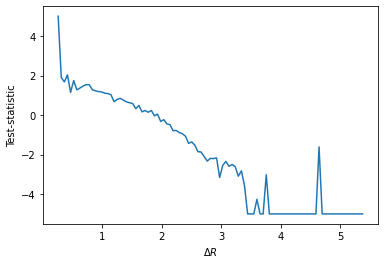

In [ ]:
epsilon = 1e-12
likelihood_ratio = np.log(s_hist / np.clip(b_hist, epsilon, 1e100) + epsilon )
likelihood_ratio = np.clip(likelihood_ratio, -5, 5)
plt.plot ( 0.5*(xAxis[:-1]+xAxis[1:]), likelihood_ratio )
plt.xlabel ( '$\Delta R$' )
plt.ylabel ( 'Test-statistic')
plt.show()

Unfortunately, this curve is not that interesting in itself, because it is not related to the actual discrimination power of the test statistic, it is only a rule to assign a test statistic given a value of $\Delta R$. 

However, this is a fundamental step in any classification analysis: one has to identify a function to assign a given set of variables, a single test statistic that has not necessarily a physical meaning, but that allows to maximize the separation power of the several variables. 

In this simple 1D example, we will use a linear interpolation of the function above to define the test-statistic value associated to each entry of the database.

Usually, to evaluate the quality of a test-statistic, we superpose the histograms of the value that the test statistic takes on the two dataset that we are trying to distinguish.

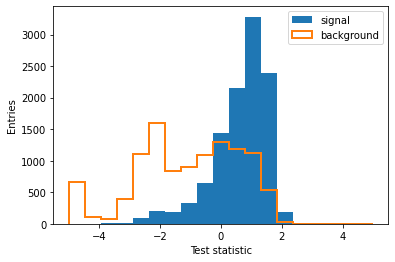

In [ ]:
s_teststat = np.interp ( signal['drll'].values, 0.5*(xAxis[:-1]+xAxis[1:]), likelihood_ratio )
b_teststat = np.interp ( background['drll'].values, 0.5*(xAxis[:-1]+xAxis[1:]), likelihood_ratio )
plt.hist ( s_teststat, bins = np.linspace(-5,5,20), label = 'signal' )
plt.hist ( b_teststat, bins = np.linspace(-5,5,20), histtype='step', linewidth=2, label='background' )
plt.xlabel('Test statistic')
plt.ylabel('Entries')
plt.legend()
plt.show()

Here it is! No physical meaning, same separation power as the single variable!

### Plotting the ROC curve
Ok we have a test-statistic, let's try to use it to discriminate between signal and background, computing for each possible threshold what would be the background rejection and the signal selection efficiency.

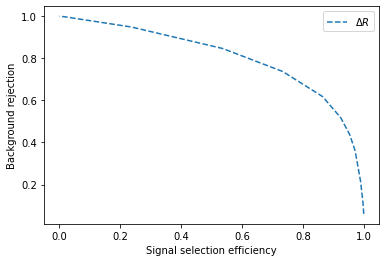

In [ ]:
s_hist = np.histogram ( s_teststat, bins = np.linspace(-5,5,20))[0] / len(signal)
b_hist = np.histogram ( b_teststat, bins = np.linspace(-5,5,20))[0] / len(background)
s_eff  = 1. - np.cumsum ( s_hist )
b_rej  = np.cumsum ( b_hist )
plt.plot ( s_eff, b_rej, '--', label = '$\Delta R$')
plt.xlabel ("Signal selection efficiency")
plt.ylabel ("Background rejection")
plt.legend()
plt.show()

This ROC (Receiver-Operator Curve) is important because it allows to compare 
the performance of several different classification algorithms. 
The ideal classifier would push the curve to the top-right corner of the graph, allowing to achieve full signal selection efficiency and no background contamination. 

The ideal classification algorithm does not necessarily exists. If one tries to distinguish between candidates that are statistically equivalent, no classificator will ever be able to distinguish between the two candidates.

At the opposite extreme, a random classification that picks randomly events and labels them as signal, would have a straight-line ROC. 

Things can go event worse, though: your classifier may identify background events as signal with higher probability than real signal events. In this case the ROC curve would be "below" the the random-classifier line.

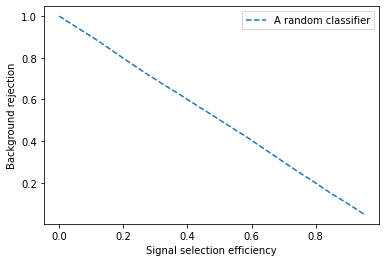

In [ ]:
s_hist = np.histogram ( np.random.uniform(-5,5,len(signal)), bins = np.linspace(-5,5,20))[0] / len(signal)
b_hist = np.histogram ( np.random.uniform(-5,5,len(signal)), bins = np.linspace(-5,5,20))[0] / len(background)
s_eff  = 1. - np.cumsum ( s_hist )
b_rej  = np.cumsum ( b_hist )
plt.plot ( s_eff, b_rej, '--', label = 'A random classifier')
plt.xlabel ("Signal selection efficiency")
plt.ylabel ("Background rejection")
plt.legend()
plt.show()

### Exercise 1.2
Try to repeat the computation of the ROC curve for every single variable in the dataset and superpose all of them on a single plot. 
Do you obtain the same ranking as you obtained with the Kolmogorov distance?

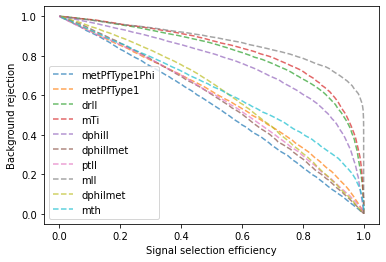

In [ ]:
## Solution of Exercise 1.2, to be hidden to students.

for varName in dataset.columns:
  if varName in ('njet', 'label'): continue
  var = dataset[varName].values
  s_var = signal[varName].values
  b_var = background[varName].values
  xAxis = np.linspace ( var.min(), var.max(), 100 )
  s_Pdf  = np.histogram ( s_var, bins=xAxis )[0] / len (s_var)
  b_Pdf  = np.histogram ( b_var, bins=xAxis )[0] / len (b_var)
  likelihood_ratio = np.log ( np.maximum ( 1e-12, s_Pdf/(b_Pdf + 1e-12)) )
  s_dll = np.interp ( s_var, 0.5*(xAxis[:-1]+xAxis[1:]), likelihood_ratio )  
  b_dll = np.interp ( b_var, 0.5*(xAxis[:-1]+xAxis[1:]), likelihood_ratio )

  thresholds = np.quantile (np.concatenate((s_dll,b_dll)), np.linspace(0,1,100))
  s_eff = 1. - np.cumsum ( np.histogram (s_dll, bins=thresholds)[0] / len(s_var) )
  b_rej = np.cumsum ( np.histogram (b_dll, bins=thresholds)[0] / len(b_var) )

  plt.plot (s_eff, b_rej, '--', label = varName, alpha=0.7)
  

plt.xlabel ("Signal selection efficiency")
plt.ylabel ("Background rejection")

plt.legend()
plt.show()